# Análisis exploratorio de "Encuesta de percepción sobre salud mental durante la cuarentena por COVID - 19 en Bogotá"
Podrás descargar este dataset en https://www.datos.gov.co/dataset/Encuesta-de-percepci-n-sobre-salud-mental-durante-/2pwg-teum/about_data

In [451]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import missingno as msn
from column_dictionary import questions
import warnings
warnings.filterwarnings("ignore")

Esta es una extensión de Pandas que se encuentra en esta misma carpeta para tratar los datos faltantes.

In [452]:
%run pandas-missing-extension.ipynb

Procesanmdo el csv que contiene el Dataset, este se encuentra separado por ";"

In [453]:
df = pd.read_csv(
    "./data/base_saludmental.csv",
    sep=";"
)

Mostrando primeros 5 registros del Dataset

In [454]:
df.head()

,Marca temporal,"1. Para empezar, nos gustaría saber qué tanto confía en la gente de su manzana o vecindario. Podría decir que entre sus vecinos usted confía en:","2. ¿Durante el mes pasado, qué tan seguido habló con sus vecinos?","3. ¿En un mes normal, antes de que comenzara el confinamiento en Bogotá a causa del COVID-19, con qué frecuencia hablaba con sus vecinos?","4. ¿Durante el mes pasado, qué tan seguido habló con sus amigos y familiares (incluyendo medios electrónicos como chats, redes sociales, llamadas telefónicas, videollamadas, etc.)?","5. En un mes normal, antes de que comenzara el confinamiento en Bogotá a causa del COVID-19, ¿con qué frecuencia hablaba con sus amigos y familiares (incluyendo medios electrónicos como chats, redes sociales, llamadas telefónicas, videollamadas, etc.)?","6. El gobierno ha promovido medidas de autocuidado (cuidarse a usted mismo) como el aislamiento social, el uso de tapabocas, el lavado de manos y mantener el distanciamiento físico. En una escala de 1 a 5, donde 1 equivale a ""nada"" y 5 a ""totalmente"": [¿Considera que usted ha cumplido con las medidas de autocuidado?]","6. El gobierno ha promovido medidas de autocuidado (cuidarse a usted mismo) como el aislamiento social, el uso de tapabocas, el lavado de manos y mantener el distanciamiento físico. En una escala de 1 a 5, donde 1 equivale a ""nada"" y 5 a ""totalmente"": [¿Considera que sus familiares han cumplido con las medidas de autocuidado?]","6. El gobierno ha promovido medidas de autocuidado (cuidarse a usted mismo) como el aislamiento social, el uso de tapabocas, el lavado de manos y mantener el distanciamiento físico. En una escala de 1 a 5, donde 1 equivale a ""nada"" y 5 a ""totalmente"": [¿Considera que sus vecinos han cumplido con las medidas de autocuidado?]","7. Para usted, la estrategia de comunicación y la información presentada por la alcaldía en relación con el COVID-19 hasta este momento ha sido: [Clara]","7. Para usted, la estrategia de comunicación y la información presentada por la alcaldía en relación con el COVID-19 hasta este momento ha sido: [Suficiente]","7. Para usted, la estrategia de comunicación y la información presentada por la alcaldía en relación con el COVID-19 hasta este momento ha sido: [Verídica]","7. Para usted, la estrategia de comunicación y la información presentada por la alcaldía en relación con el COVID-19 hasta este momento ha sido: [Oportuna]","7. Para usted, la estrategia de comunicación y la información presentada por la alcaldía en relación con el COVID-19 hasta este momento ha sido: [Contradictoria]",8. ¿Por qué medio o medios se entera usted de las decisiones tomadas por la Alcaldía frente al manejo del COVID-19? Puede marcar varias opciones,9. ¿Sabe cómo actuar o a dónde acudir ante sospechas o sistemas de contagio?,10. ¿Cree que cuenta con la información suficiente para conocer que es el COVID-19?,11. Usted considera que la información que se le ha dado a la ciudadanía por parte de la alcaldía en relación a los riesgos asociados al COVID-19 ha sido:,12. ¿Ha sido diagnosticado usted o algún conocido con COVID-19?,"13. Durante el periodo de cuarentena, en relación a su vida antes del confinamiento, usted: [Se ha sentido ansioso o nervioso]","13. Durante el periodo de cuarentena, en relación a su vida antes del confinamiento, usted: [Se ha sentido decaído o deprimido]","13. Durante el periodo de cuarentena, en relación a su vida antes del confinamiento, usted: [Se ha sentido tranquilo]","13. Durante el periodo de cuarentena, en relación a su vida antes del confinamiento, usted: [Se ha sentido cercano a las personas con las que convive]","13. Durante el periodo de cuarentena, en relación a su vida antes del confinamiento, usted: [Ha sentido interés o placer al hacer las cosas]","13. Durante el periodo de cuarentena, en relación a su vida antes del confinamiento, usted: [Ha tenido problemas para dormir]","13. Durante el periodo de cuarentena, en relación a su vida antes del confi

Mostrando dimensiones del dataset

In [455]:
df.shape

(4998, 55)

Dado que dejar el encabezado de la pregunta es demasiado largo para ser un nombre de columna, he creado un diccionario en **column_dictionary.py** para representar las preguntas con nombres de variable.

In [456]:
new_columns = [questions[col_name] for col_name in df.columns]
df. columns = new_columns
df.head()

,timestamp,confianza_vecinos,frecuencia_habla_vecinos_mes_pasado,frecuencia_habla_vecinos_mes_normal,frecuencia_habla_amigos_familia_mes_pasado,frecuencia_habla_amigos_familia_mes_normal,cumplimiento_autocuidado_personal,cumplimiento_autocuidado_familiares,cumplimiento_autocuidado_vecinos,estrategia_comunicacion_clara,estrategia_comunicacion_suficiente,estrategia_comunicacion_veridica,estrategia_comunicacion_oportuna,estrategia_comunicacion_contradictoria,medios_info_alcaldia,sabe_actuar_sospechas_contagio,info_suficiente_COVID,info_riesgos_COVID_alcaldia,diagnostico_COVID,ansiedad_cuarentena,depresion_cuarentena,tranquilidad_cuarentena,cercania_convive_cuarentena,interes_placer_cuarentena,problemas_dormir_cuarentena,desacuerdos_convive_cuarentena,necesidad_alcohol_cuarentena,necesidad_fumar_cuarentena,necesidad_sustancias_psicoactivas_cuarentena,factores_preocupacion_cuarentena,apoyo_pareja_cuarentena,apoyo_familia_cuarentena,apoyo_amigos_cuarentena,apoyo_empleador_entidad_educativa_cuarentena,apoyo_vecinos_cuarentena,apoyo_alcaldia_cuarentena,apoyo_gobierno_nacional_cuarentena,sexo,edad,rango_edad,diagnostico_enfermedades,nivel_educativo,localidad_residencia,situacion_laboral,condiciones_vivienda_tranquilidad_comodidad,num_personas_hogar,num_personas_5_menos,num_personas_6_18,num_personas_19_64,num_personas_65_mas,oportunidad_expresar_sentimientos,frecuencia_actividad_fisica_mes,exposicion_violencia_hogar,diagnostico_salud_mental,continuidad_tratamiento_salud_mental
0,"44018,34521",La mayoría,Nada,Algunas veces al mes,Casi todos los días,Algunas veces a la semana,5 Totalmente,5 Totalmente,5 Totalmente,Sí,Sí,Sí,Sí,No,Televisión,Sí,Sí,Precisa,No,Mucho más que antes,Mucho más que antes,Un poco menos que antes,Mucho más que antes,Un poco menos que antes,Un poco más que antes,Igual que antes,No consumo,No consumo,No consumo,Que usted o alguno de sus familiares o amigos ...,5 Todo el que necesito,5 Todo el que necesito,5 Todo el que necesito,5 Todo el que necesito,1 Nada,4,4,Mujer,39.0,De 36 a 45,Sí,Título universitario,Fontibón,Independiente,Sí,Cuatro,Una,Una,Dos,Ninguna,Sí,Ninguna vez,1.0,No,No aplica
1,"44018,34595",Algunos,Nada,Nada,Casi todos los días,Algunas veces al mes,5 Totalmente,4,3,No,No,Sí,Sí,Sí,"Redes sociales (Twitter, Facebook, Instagram, ...",No,Sí,Precisa,No,Un poco más que antes,Un poco más que antes,Un poco menos que antes,Un poco más que antes,Un poco menos que antes,Un poco más que antes,Un poco más que antes,Un poco menos que antes,Mucho menos que antes,No consumo,Que usted o alguno de sus familiares o amigos ...,1 Nada,5 Todo el que necesito,5 Todo el que necesito,4,2,2,2,Mujer,43.0,De 36 a 45,Sí,Título universitario,Fontibón,Empleado,Sí,Dos,Ninguna,Ninguna,Una,Ninguna,Sí,Menos de una vez a la semana,1.0,Sí,Sí
2,"44018,34611",Algunos,Algunas veces a la semana,Algunas veces a la semana,Casi todos los días,Casi todos los días,5 Totalmente,5 Totalmente,3,Sí,Sí,Sí,Sí,No,"Televisión, Periódicos, Radio, Redes sociales ...",Sí,Sí,Precisa,No,Mucho menos que antes,Mucho menos que antes,Mucho más que antes,Mucho más que antes,Mucho más que antes,Mucho menos que antes,Un poco menos que antes,No consumo,No consumo,No consumo,Que usted o alguno de sus familiares o amigos ...,5 Todo el que necesito,5 Todo el que necesito,3,4,2,3,2,Mujer,52.0,De 46 a 59,Sí,Título de posgrado,Suba,Empleado,Sí,Tres,Ninguna,Ninguna,Tres,Ninguna,Sí,Más de una vez a la semana,1.0,No,No aplica
3,"44018,35482",La mayoría,Algunas veces a la semana,Algunas veces a la semana,Casi todos los días,Casi todos los días,5 Totalmente,4,4,Sí,Sí,No sabe,Sí,No,"Televisión, Redes sociales (Twitter, Facebook,...",Sí,Sí,Precisa,No,Un poco más que antes,Igual que antes,Un poco menos que antes,Igual que antes,Igual que antes,Igual que antes,Un poco más que antes,No consumo,No consumo,No consumo,Que usted o alguno de sus familiares o amigos ...,4,5 Todo el que necesito,3,4,3,3,2,Mujer,53.0,De 46 a 59,Sí,Título universitario,No reside en Bogotá,Empleado,Sí,Cuatro,N

## Datos faltantes

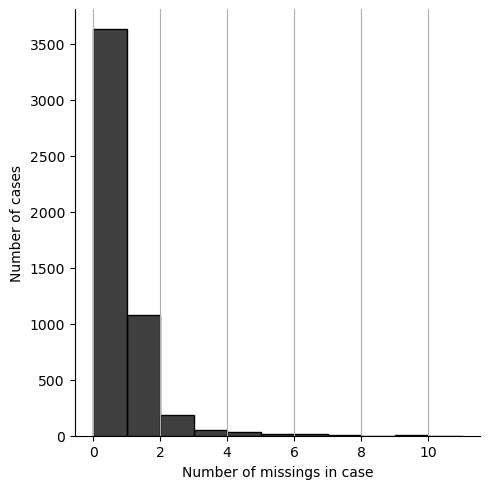

In [457]:
df.missing.missing_case_plot()

Revisión de cuantros valores son faltantes por variable

In [458]:
missing_values_summary = df.missing.missing_variable_summary()
missing_values_summary = missing_values_summary[missing_values_summary['n_missing'] > 0].reset_index()
missing_values_summary.sort_values('n_missing', ascending=False, inplace=True)
missing_values_summary

,index,variable,n_missing,n_cases,pct_missing
29,54,continuidad_tratamiento_salud_mental,887,4998,17.747099
10,30,apoyo_pareja_cuarentena,310,4998,6.202481
13,33,apoyo_empleador_entidad_educativa_cuarentena,154,4998,3.081232
16,36,apoyo_gobierno_nacional_cuarentena,84,4998,1.680672
14,34,apoyo_vecinos_cuarentena,81,4998,1.620648
15,35,apoyo_alcaldia_cuarentena,74,4998,1.480592
12,32,apoyo_amigos_cuarentena,59,4998,1.180472
19,39,rango_edad,26,4998,0.520208
25,50,oportunidad_expresar_sentimientos,25,4998,0.500200
6,15,sabe_actuar_sospechas_contagio,20,4998,0.400160


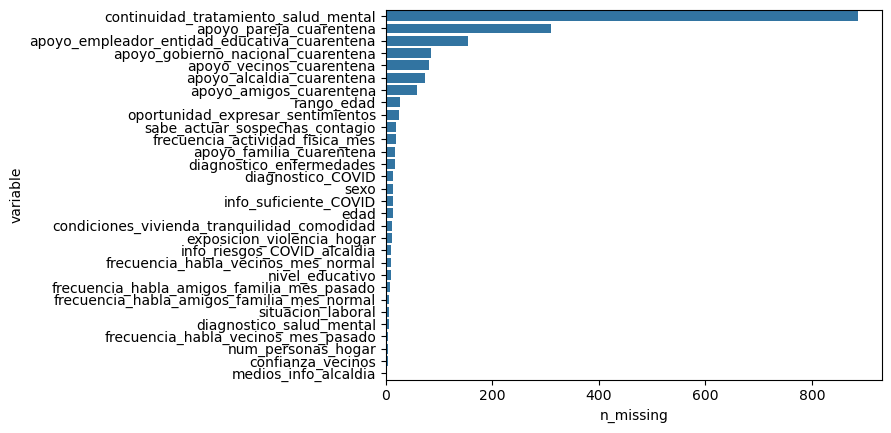

In [459]:
sns.barplot(
    x=missing_values_summary['n_missing'],
    y=missing_values_summary['variable']
)
plt.show()

Aquí podemos ver que un 17.74% no contestó la variable **continuidad_tratamiento_salud_mental** que corresponde a **20. En caso de que la respuesta a la pregunta anterior sea "Sí", ¿ha podido continuar el tratamiento durante el periodo de cuarentena?**, pero también podemos ver que esta depende de la pregunta anterior **19. ¿Usted o alguna de las personas con las que vive ha sido diagnosticado con alguna enfermedad de salud mental que requiera tratamiento?** el cual solo un 0.12% no respondió esa pregunta, lo que no hace relevante que este 17.74% haya omitido esta pregunta, ya que un 80.92% respondió que no y un 6.12% respondió que no está seguro.

In [460]:
df['diagnostico_salud_mental'].value_counts(normalize=True) * 100

diagnostico_salud_mental
No                80.929487
Sí                12.940705
No está seguro     6.129808
Name: proportion, dtype: float64

In [461]:
variables_missing = missing_values_summary.variable.to_list()

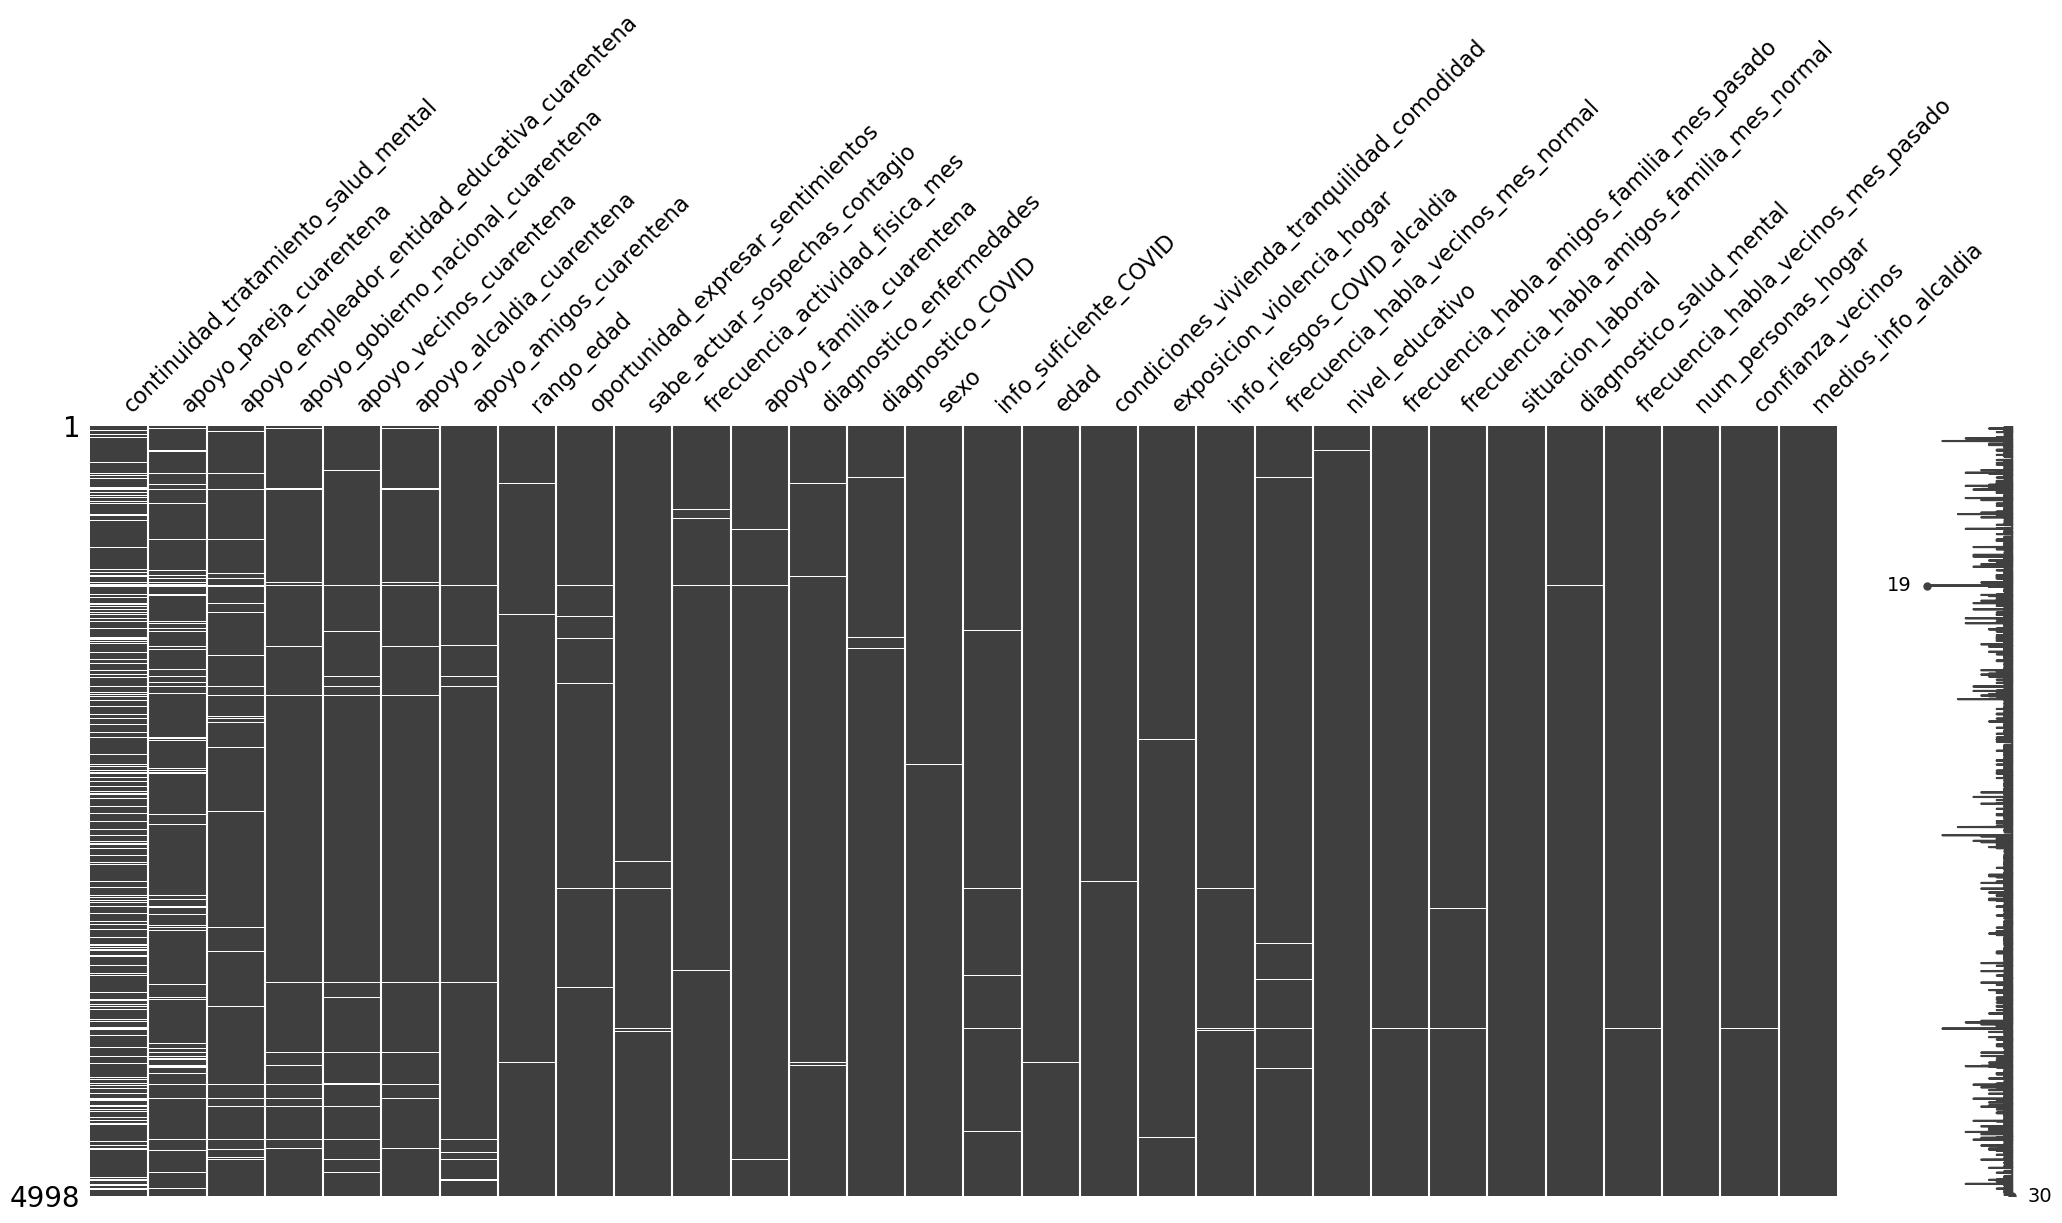

In [462]:
msn.matrix(df=df[variables_missing])
plt.show()

## Funciones Utilities

Función para devolver el nombre llave del diccionario Questions

In [463]:
def get_key_from_questions(val):
    for key, value in questions.items():
        if value == val:
            return key
    return None

Función para mostrar la distribución de una variable

In [464]:
def show_distribution(col):
    column = list(questions.values())[col]
    question = get_key_from_questions(column)
    
    print(f"\nNombre de variable: {column}",sep='\n')
    
    value_counts = df[column].value_counts(normalize=True).sort_values(ascending=False) * 100
    
    for index, value in value_counts.items():
        print(f'{index}: {value:.2f}%')
    
    plot_data = pd.DataFrame({
        'valores_unicos': value_counts.index,
        'porcentajes': value_counts.values
    })
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='valores_unicos', y='porcentajes', data=plot_data)
    
    plt.xlabel(column)
    plt.title(textwrap.fill(question, 100))
    
    wrapped_labels = [textwrap.fill(label, 10) for label in plot_data['valores_unicos']]
    ax.set_xticklabels(wrapped_labels, rotation=0)
    
    plt.show()



Nombre de variable: confianza_vecinos
Algunos: 48.36%
La mayoría: 29.32%
Ninguno: 18.68%
Todos: 3.64%


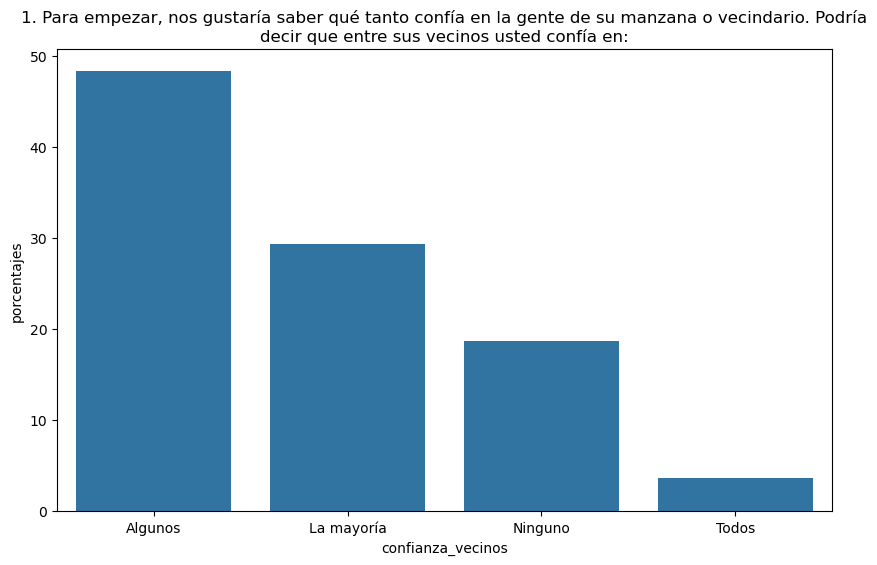

In [465]:
show_distribution(1)


Nombre de variable: frecuencia_habla_vecinos_mes_pasado
Nada: 38.03%
Algunas veces al mes: 28.28%
Una vez: 19.59%
Algunas veces a la semana: 11.30%
Casi todos los días: 1.50%
No está seguro: 1.30%


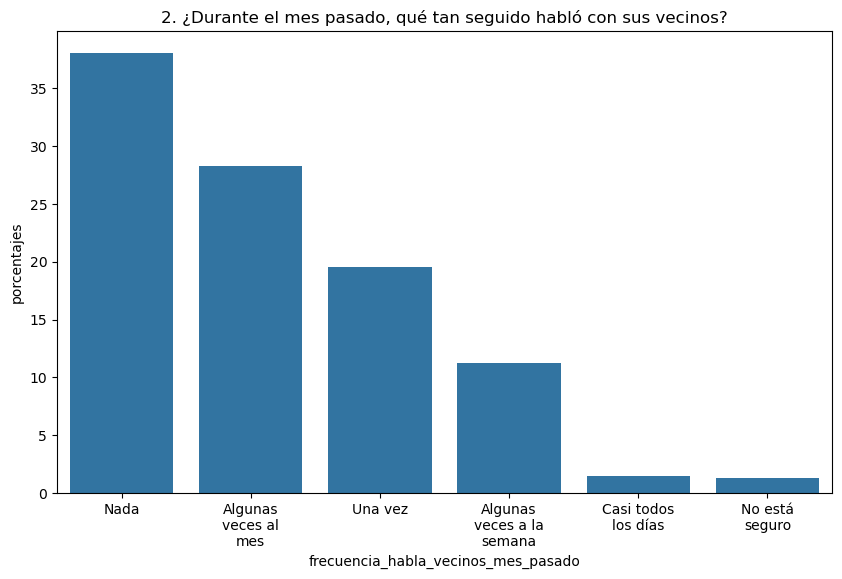

In [466]:
show_distribution(2)


Nombre de variable: frecuencia_habla_vecinos_mes_normal
Algunas veces al mes: 33.41%
Algunas veces a la semana: 24.31%
Nada: 20.69%
Una vez: 11.16%
Casi todos los días: 9.02%
No está seguro: 1.40%


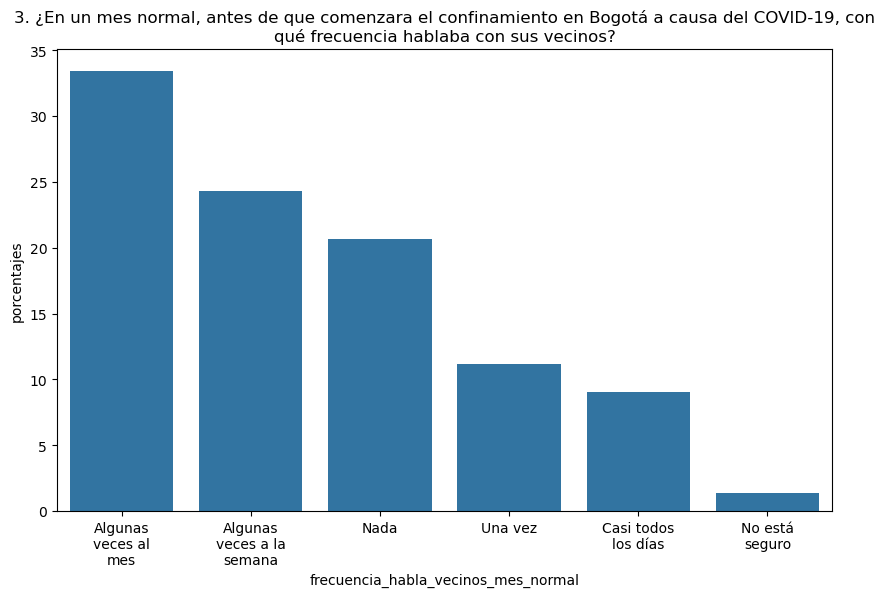

In [467]:
show_distribution(3)


Nombre de variable: frecuencia_habla_amigos_familia_mes_pasado
Casi todos los días: 55.41%
Algunas veces a la semana: 30.04%
Algunas veces al mes: 11.96%
Una vez: 1.34%
Nada: 1.04%
No está seguro: 0.20%


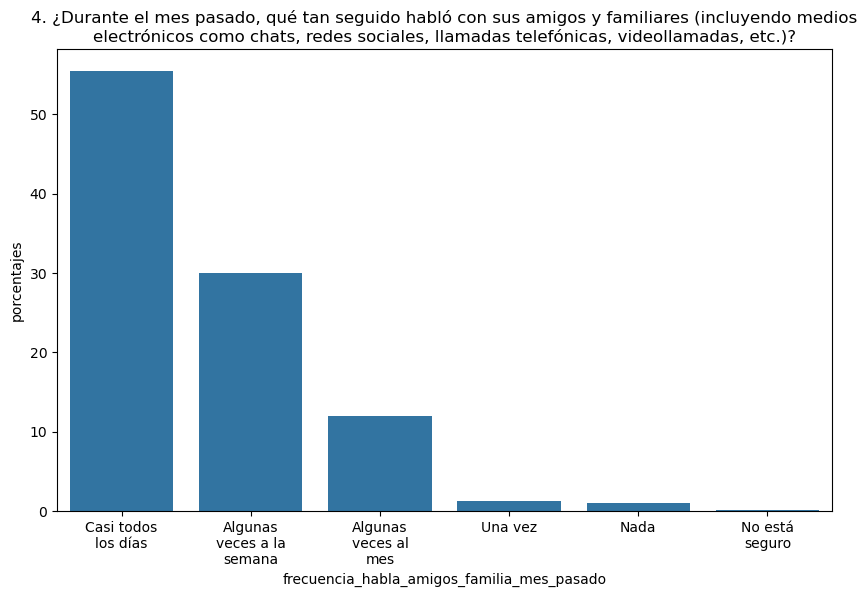

In [468]:
show_distribution(4)


Nombre de variable: frecuencia_habla_amigos_familia_mes_normal
Casi todos los días: 58.09%
Algunas veces a la semana: 30.51%
Algunas veces al mes: 9.90%
Una vez: 1.02%
Nada: 0.32%
No está seguro: 0.16%


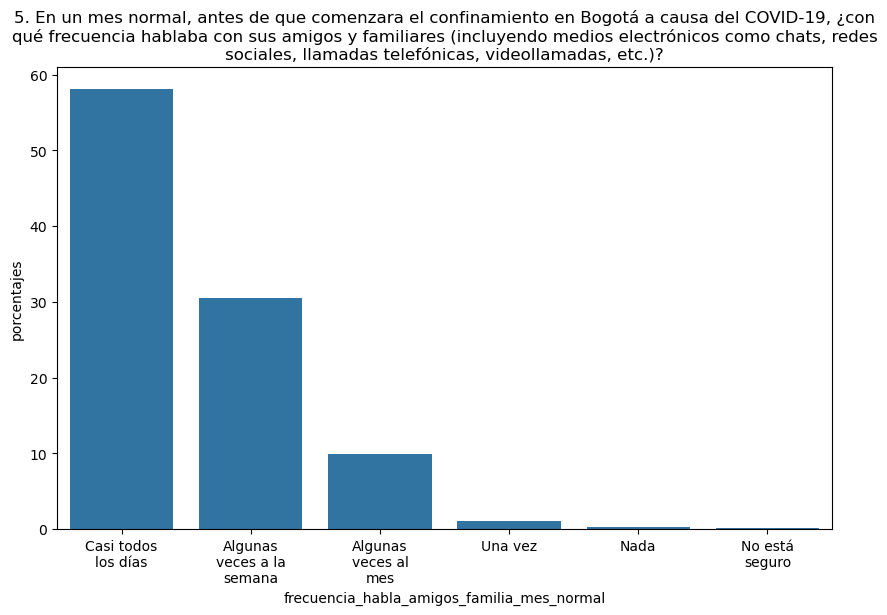

In [469]:
show_distribution(5)


Nombre de variable: cumplimiento_autocuidado_personal
5 Totalmente: 65.11%
4: 24.19%
3: 8.56%
2: 1.74%
1 Nada: 0.40%


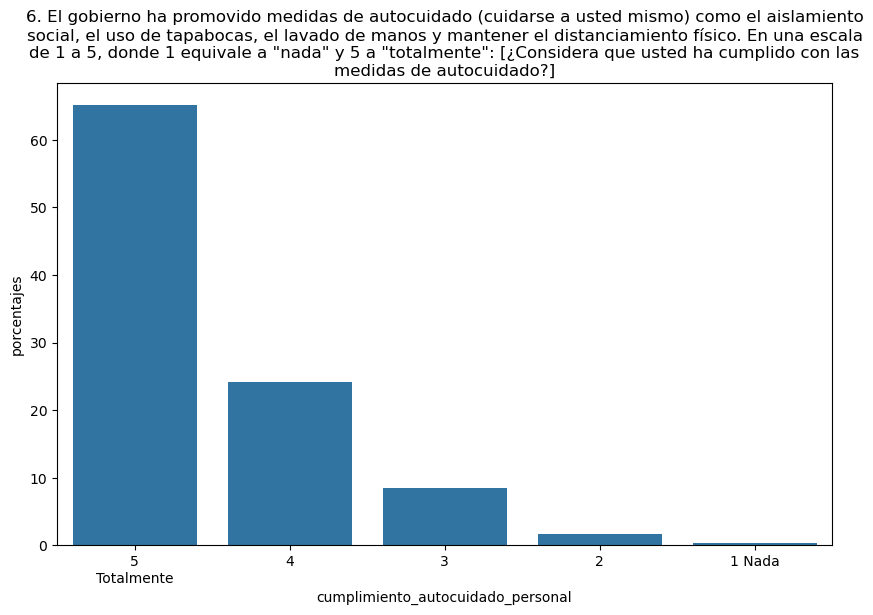

In [470]:
show_distribution(6)


Nombre de variable: cumplimiento_autocuidado_familiares
5 Totalmente: 49.12%
4: 33.91%
3: 13.05%
2: 3.40%
1 Nada: 0.52%


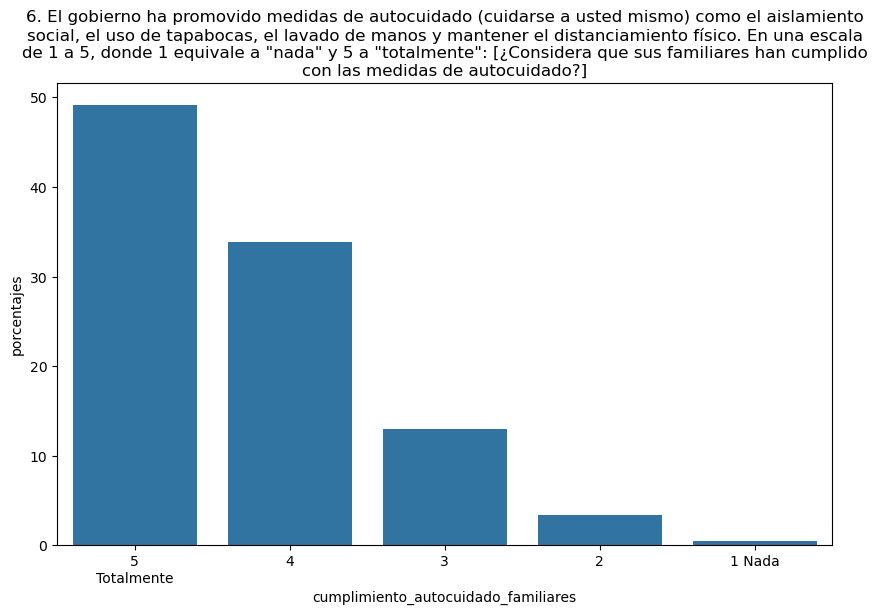

In [471]:
show_distribution(7)


Nombre de variable: cumplimiento_autocuidado_vecinos
3: 34.17%
4: 29.45%
2: 19.55%
5 Totalmente: 10.04%
1 Nada: 6.78%


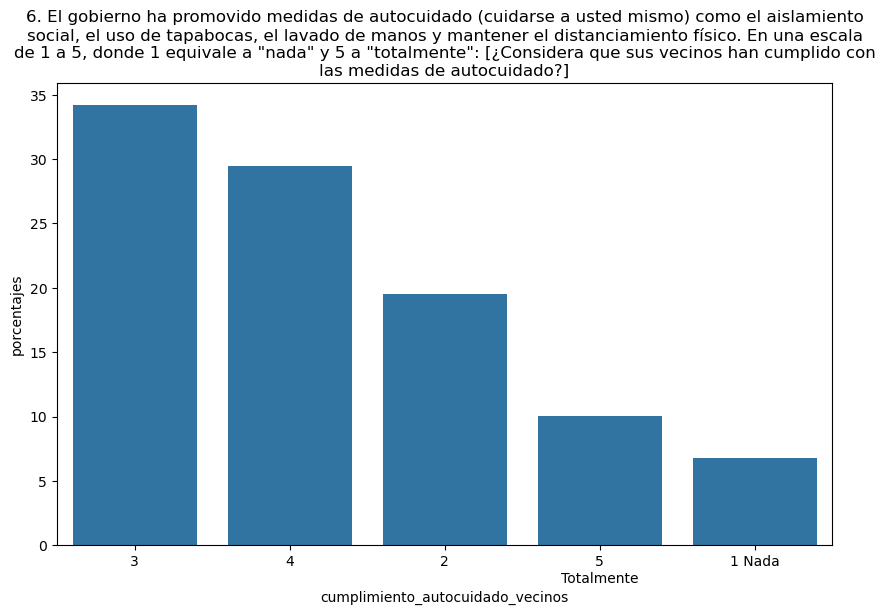

In [472]:
show_distribution(8)


Nombre de variable: estrategia_comunicacion_clara
Sí: 70.61%
No: 23.03%
No sabe: 6.36%


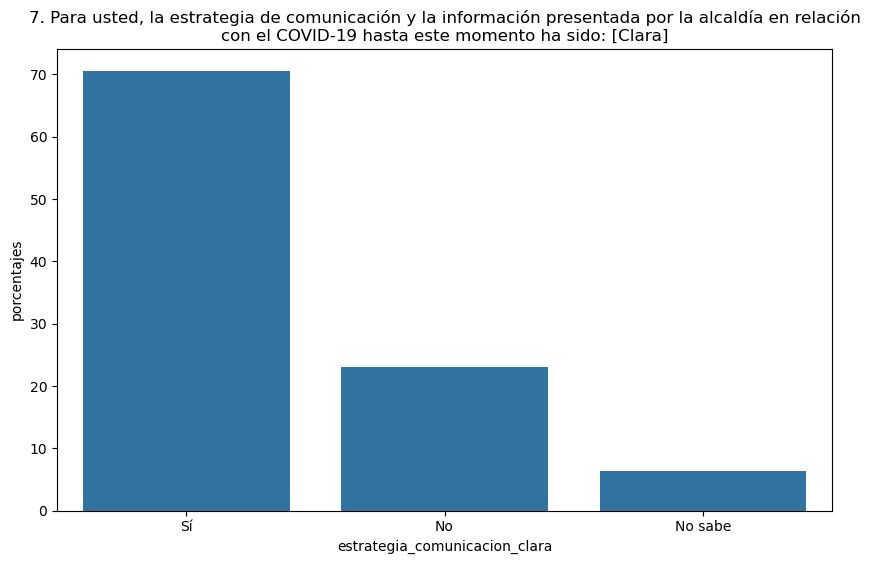

In [473]:
show_distribution(9)


Nombre de variable: estrategia_comunicacion_suficiente
Sí: 56.24%
No: 32.97%
No sabe: 10.78%


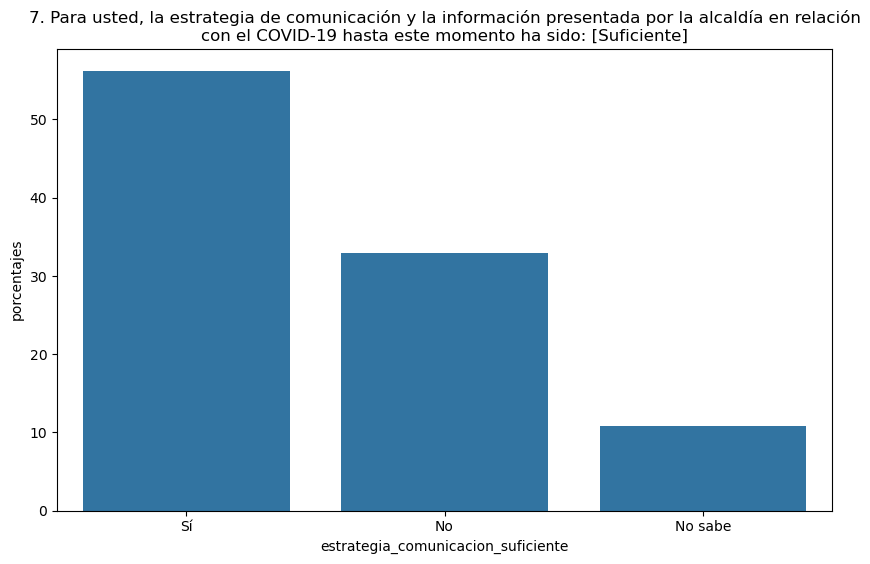

In [474]:
show_distribution(10)


Nombre de variable: estrategia_comunicacion_veridica
Sí: 57.00%
No sabe: 24.07%
No: 18.93%


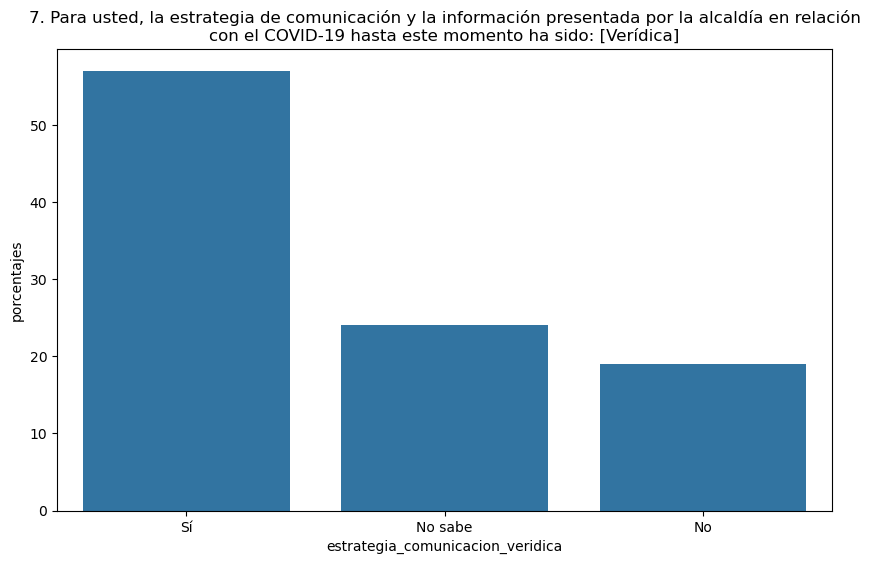

In [475]:
show_distribution(11)


Nombre de variable: estrategia_comunicacion_oportuna
Sí: 73.73%
No: 18.85%
No sabe: 7.42%


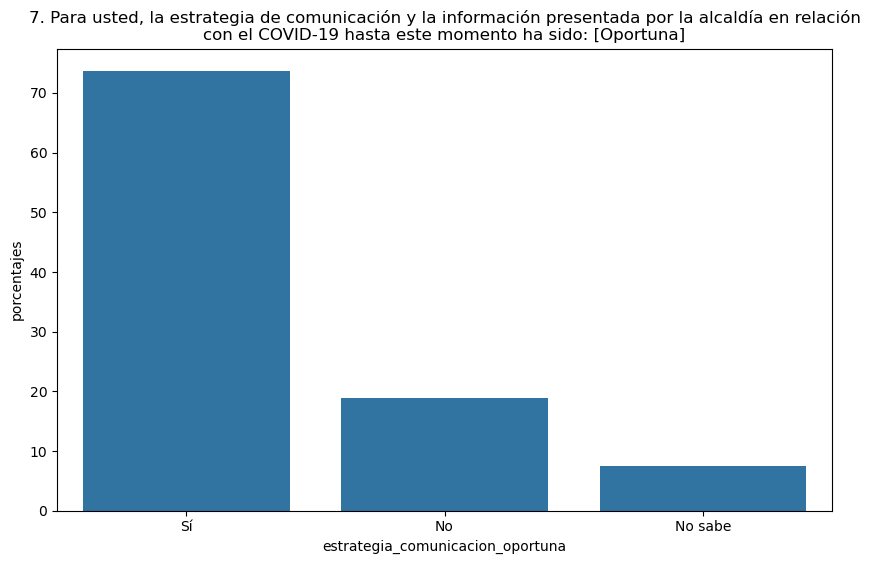

In [476]:
show_distribution(12)


Nombre de variable: estrategia_comunicacion_contradictoria
No: 56.24%
Sí: 32.01%
No sabe: 11.74%


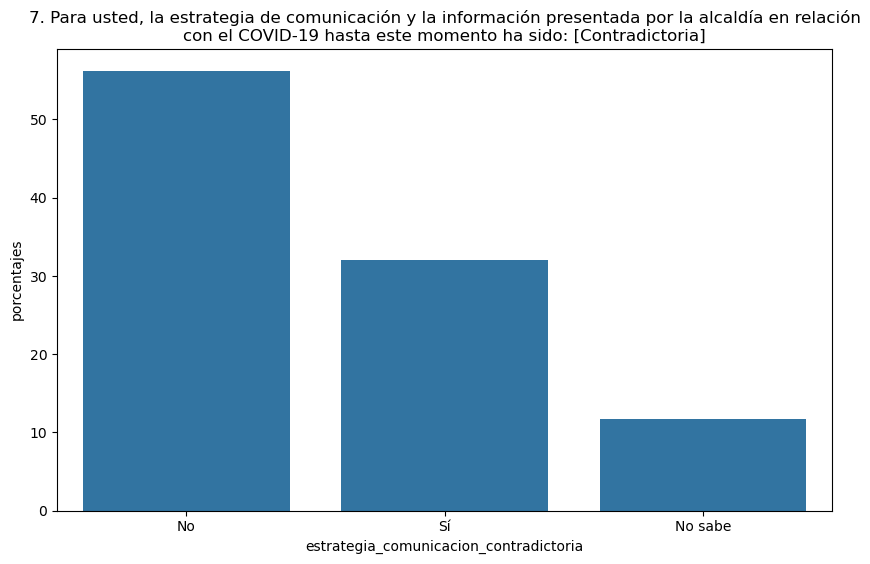

In [477]:
show_distribution(13)

In [478]:
column = list(questions.values())[14]
get_key_from_questions(column)

'8. ¿Por qué medio o medios se entera usted de las decisiones tomadas por la Alcaldía frente al manejo del COVID-19? Puede marcar varias opciones'


Nombre de variable: sabe_actuar_sospechas_contagio
Sí: 85.24%
No: 14.76%


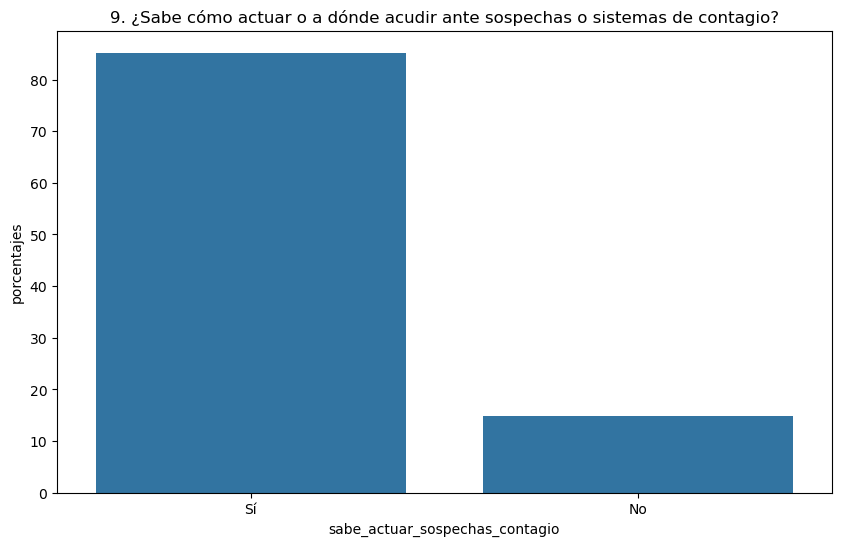

In [479]:
show_distribution(15)


Nombre de variable: info_suficiente_COVID
Sí: 82.77%
No: 17.23%


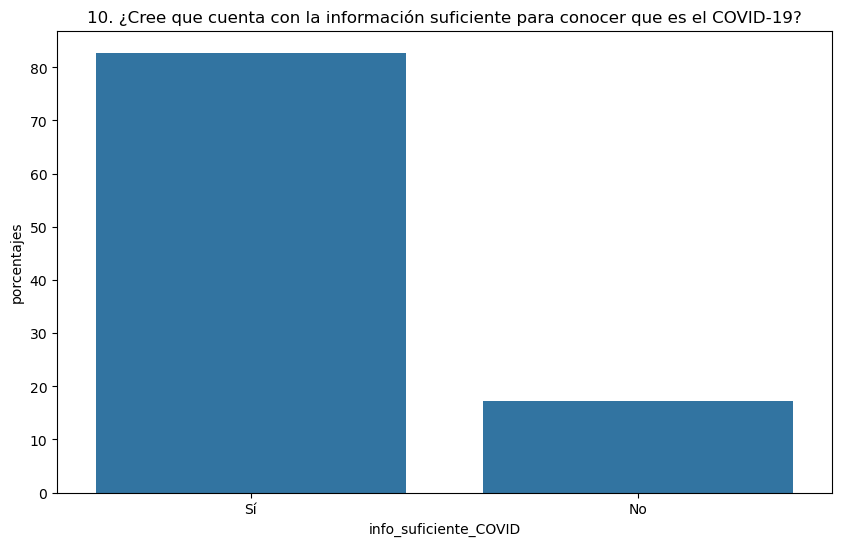

In [480]:
show_distribution(16)


Nombre de variable: info_riesgos_COVID_alcaldia
Precisa: 75.12%
Minimizada: 15.22%
Exagerada: 9.66%


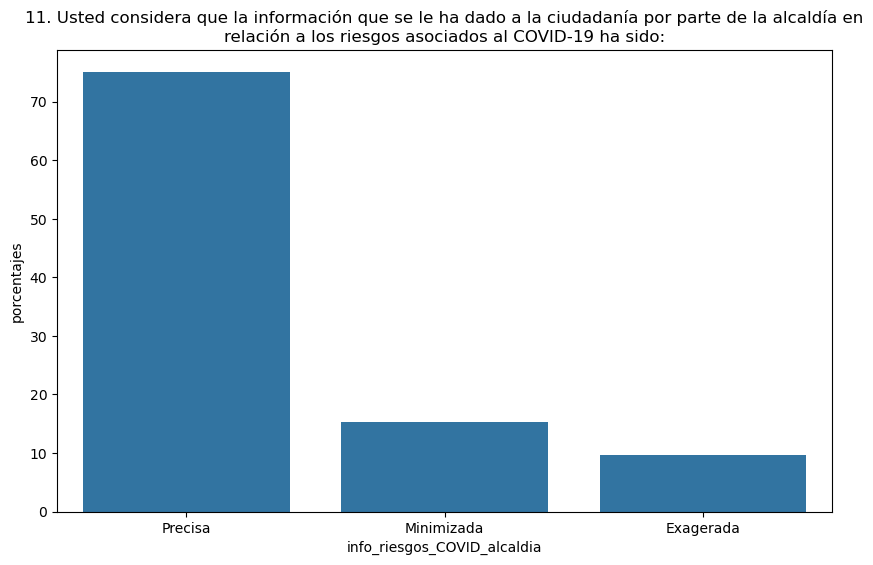

In [481]:
show_distribution(17)


Nombre de variable: diagnostico_COVID
No: 76.77%
Sí: 23.23%


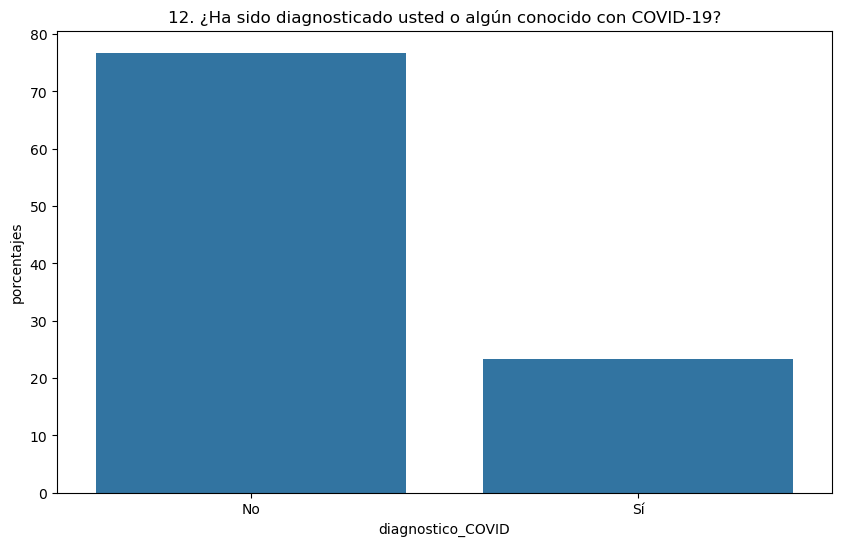

In [482]:
show_distribution(18)


Nombre de variable: ansiedad_cuarentena
Un poco más que antes: 32.21%
Mucho más que antes: 27.25%
Igual que antes: 21.83%
Mucho menos que antes: 10.14%
Un poco menos que antes: 8.56%


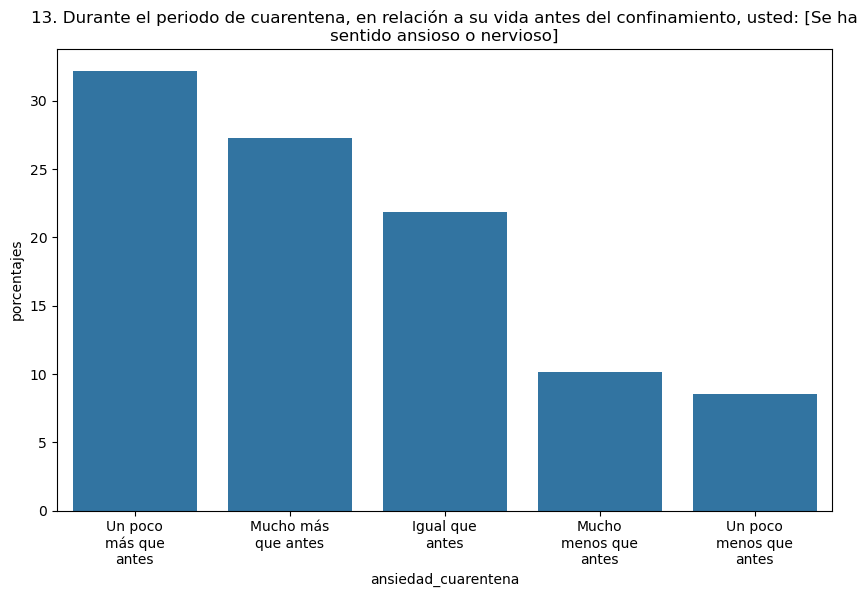

In [483]:
show_distribution(19)


Nombre de variable: depresion_cuarentena
Un poco más que antes: 31.63%
Igual que antes: 26.39%
Mucho más que antes: 20.61%
Mucho menos que antes: 12.14%
Un poco menos que antes: 9.22%


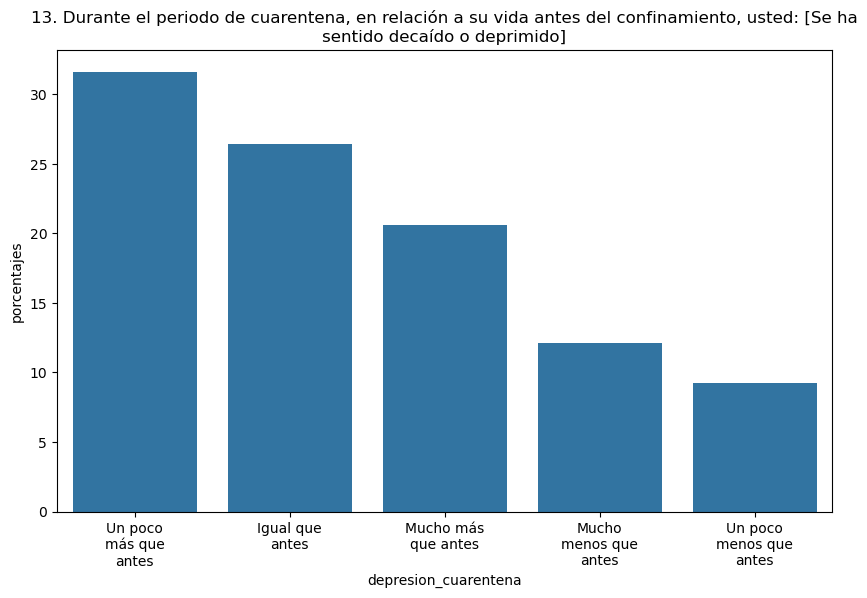

In [484]:
show_distribution(20)


Nombre de variable: tranquilidad_cuarentena
Un poco menos que antes: 32.77%
Mucho menos que antes: 27.39%
Igual que antes: 24.41%
Un poco más que antes: 8.36%
Mucho más que antes: 7.06%


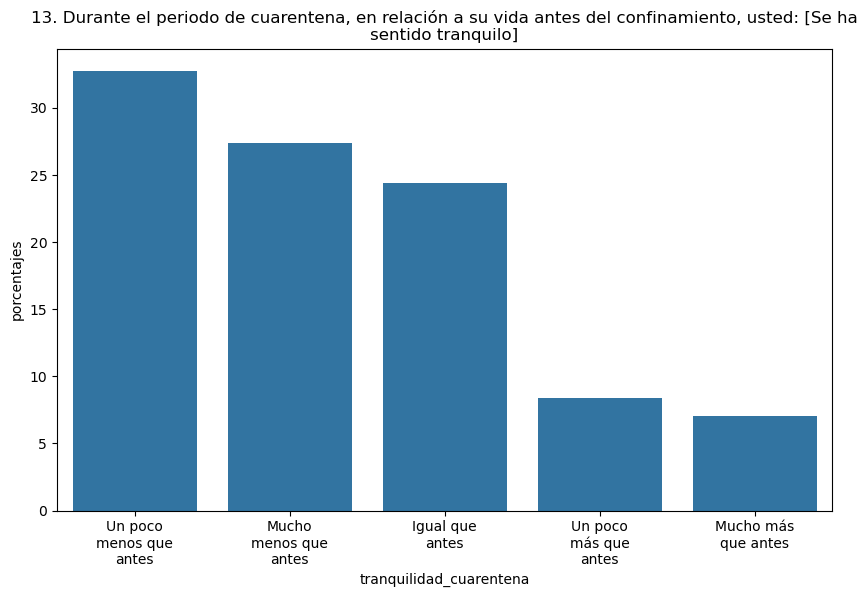

In [485]:
show_distribution(21)


Nombre de variable: cercania_convive_cuarentena
Mucho más que antes: 30.33%
Igual que antes: 29.89%
Un poco más que antes: 24.33%
Mucho menos que antes: 8.48%
Un poco menos que antes: 6.96%


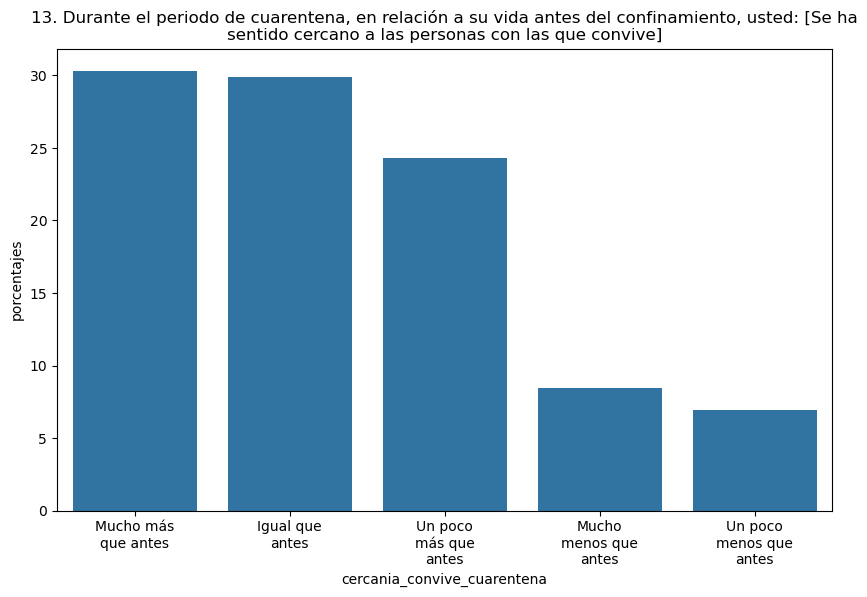

In [486]:
show_distribution(22)


Nombre de variable: interes_placer_cuarentena
Igual que antes: 38.76%
Un poco menos que antes: 23.49%
Un poco más que antes: 14.59%
Mucho menos que antes: 12.55%
Mucho más que antes: 10.62%


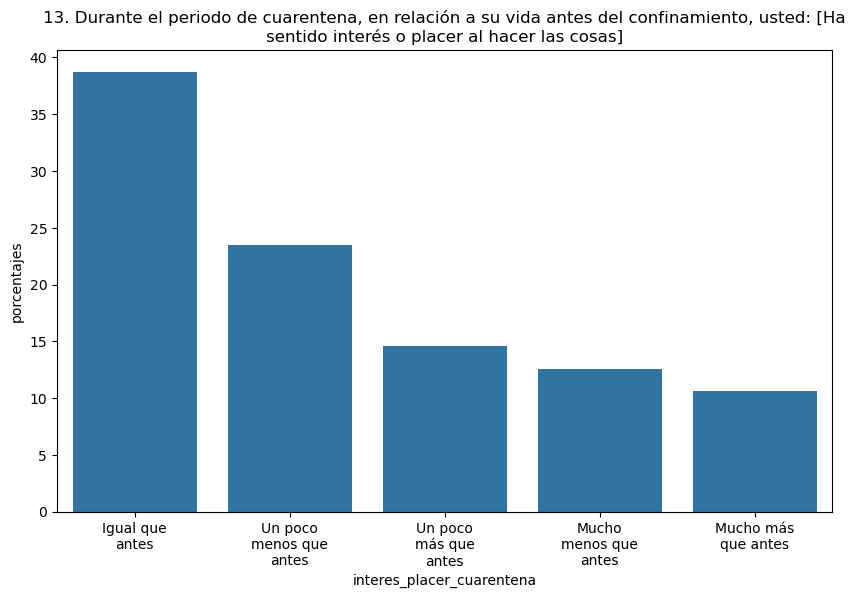

In [487]:
show_distribution(23)


Nombre de variable: problemas_dormir_cuarentena
Igual que antes: 30.41%
Un poco más que antes: 25.95%
Mucho más que antes: 23.11%
Mucho menos que antes: 11.64%
Un poco menos que antes: 8.88%


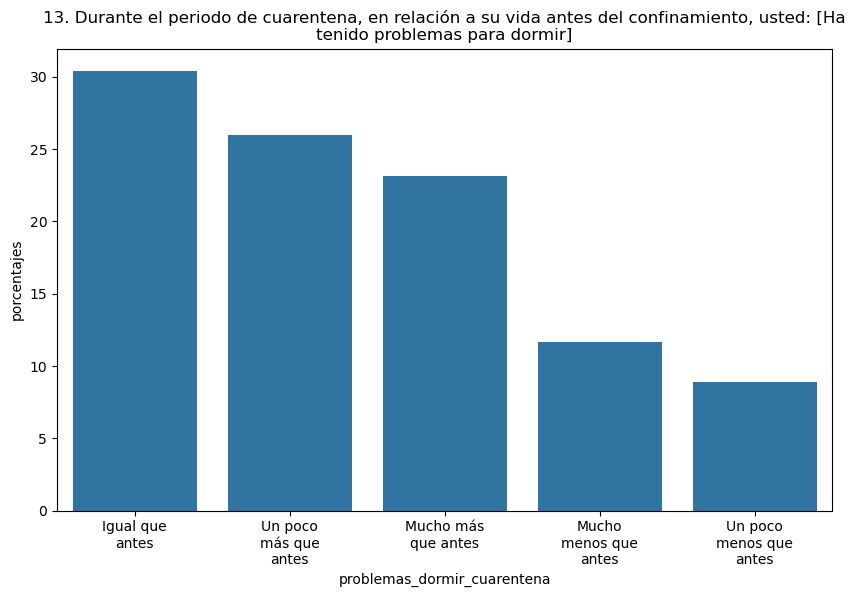

In [488]:
show_distribution(24)


Nombre de variable: desacuerdos_convive_cuarentena
Igual que antes: 39.94%
Un poco más que antes: 20.09%
Mucho menos que antes: 17.83%
Un poco menos que antes: 14.29%
Mucho más que antes: 7.86%


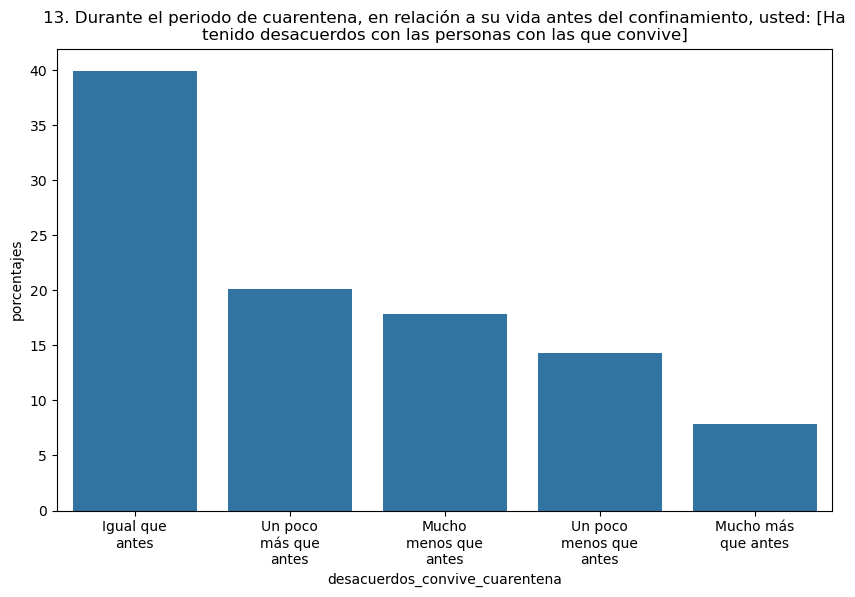

In [489]:
show_distribution(25)


Nombre de variable: necesidad_alcohol_cuarentena
No consumo: 43.84%
Igual que antes: 22.89%
Mucho menos que antes: 16.65%
Un poco más que antes: 7.46%
Un poco menos que antes: 6.56%
Mucho más que antes: 2.60%


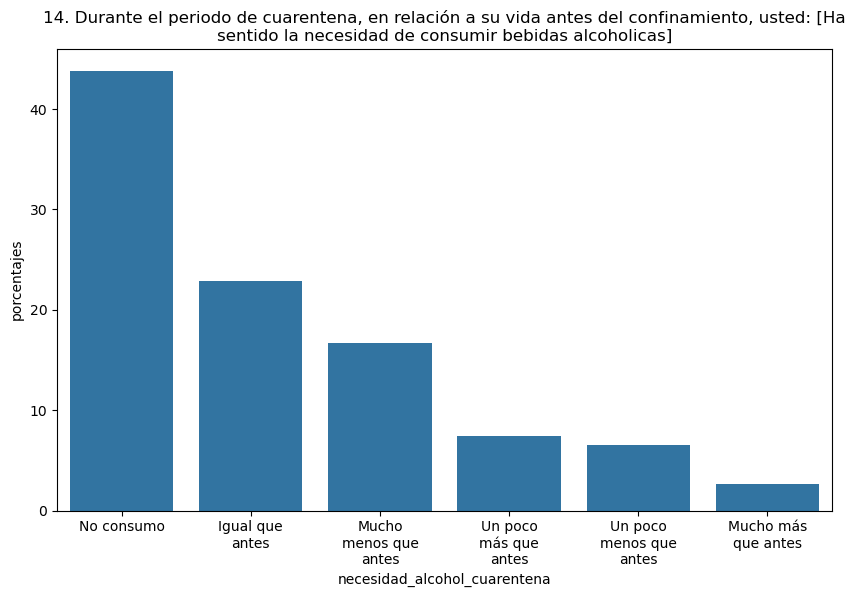

In [490]:
show_distribution(26)


Nombre de variable: necesidad_fumar_cuarentena
No consumo: 63.51%
Mucho menos que antes: 14.49%
Igual que antes: 12.30%
Un poco más que antes: 3.80%
Mucho más que antes: 3.64%
Un poco menos que antes: 2.26%


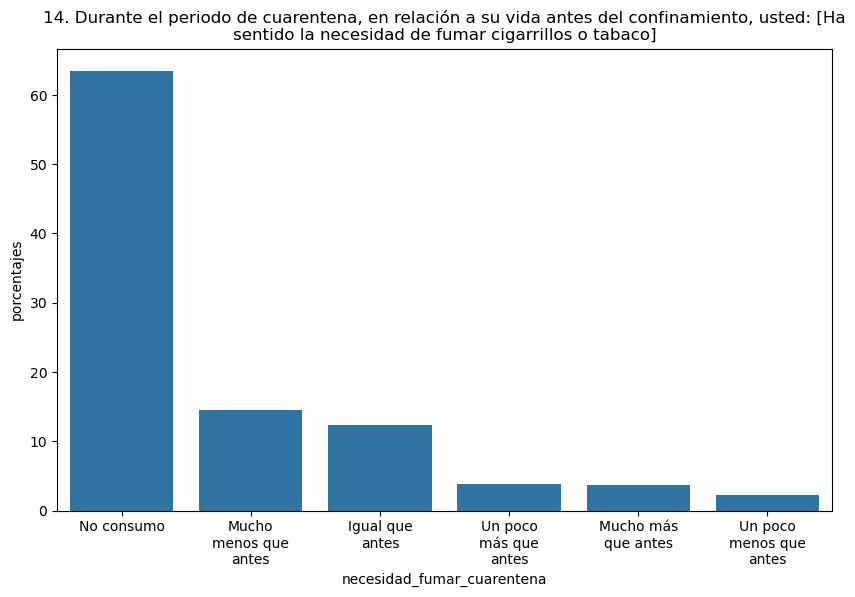

In [491]:
show_distribution(27)


Nombre de variable: necesidad_sustancias_psicoactivas_cuarentena
No consumo: 70.19%
Mucho menos que antes: 14.65%
Igual que antes: 10.82%
Un poco más que antes: 1.76%
Mucho más que antes: 1.44%
Un poco menos que antes: 1.14%


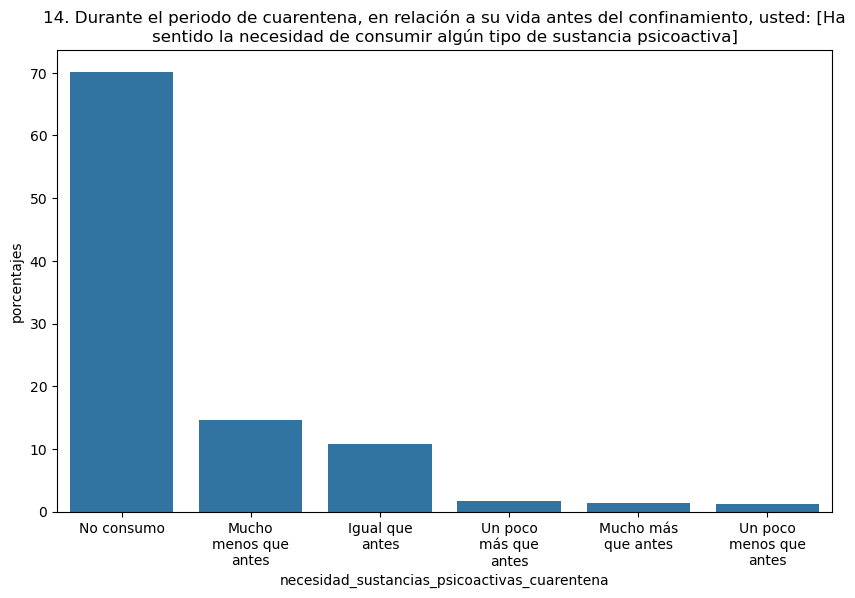

In [492]:
show_distribution(28)


Nombre de variable: apoyo_pareja_cuarentena
5 Todo el que necesito: 50.92%
1 Nada: 22.10%
4: 15.21%
3: 8.72%
2: 3.05%


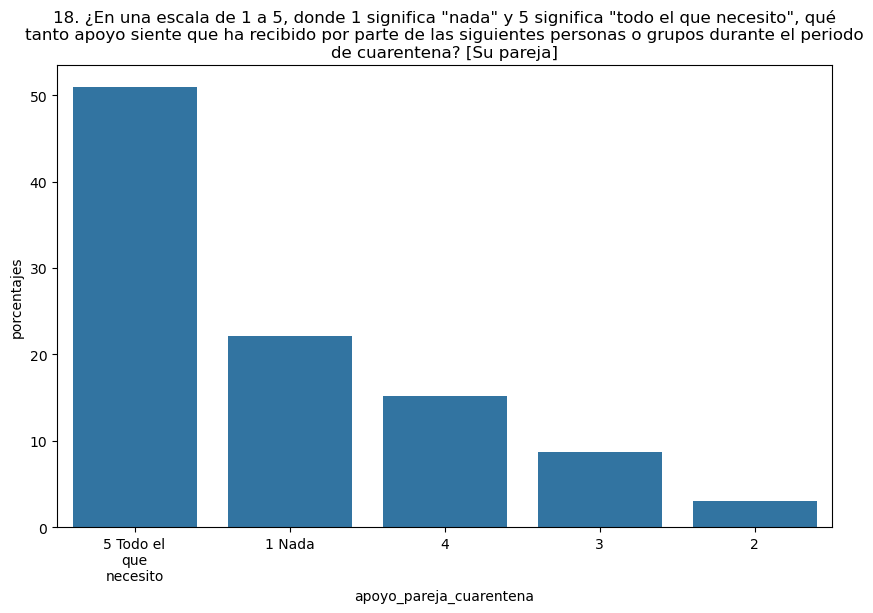

In [493]:
show_distribution(30)


Nombre de variable: apoyo_familia_cuarentena
5 Todo el que necesito: 60.36%
4: 22.03%
3: 11.53%
2: 3.76%
1 Nada: 2.33%


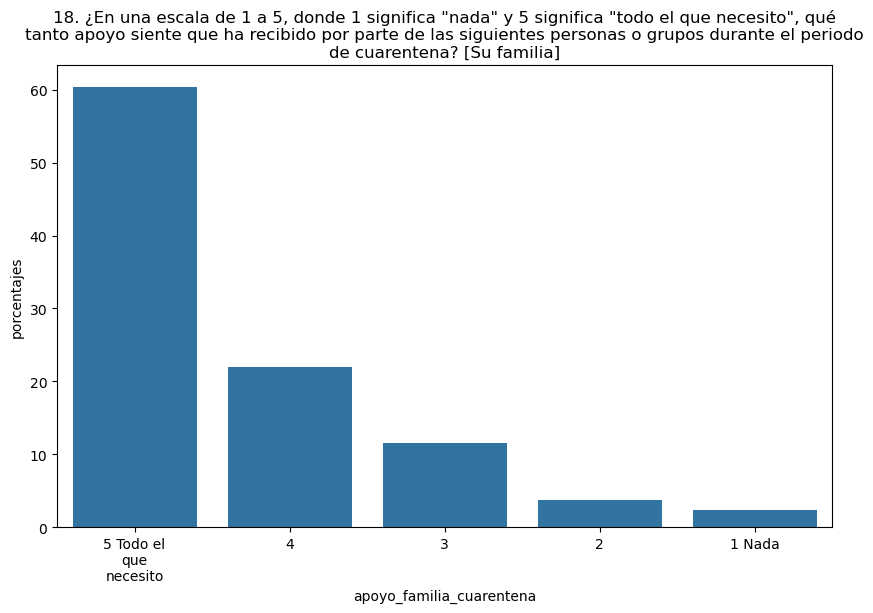

In [494]:
show_distribution(31)


Nombre de variable: apoyo_amigos_cuarentena
4: 28.69%
5 Todo el que necesito: 26.36%
3: 25.23%
2: 10.45%
1 Nada: 9.27%


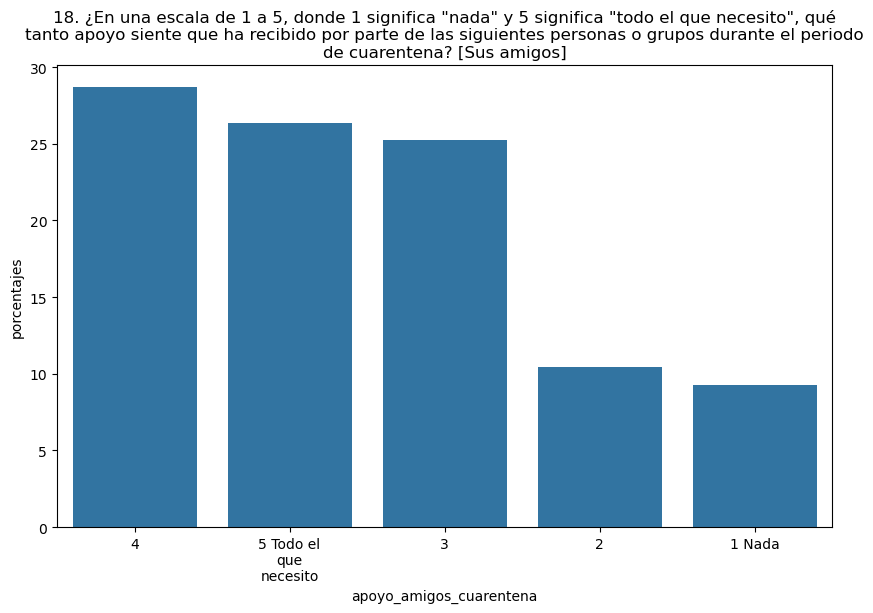

In [495]:
show_distribution(32)


Nombre de variable: apoyo_empleador_entidad_educativa_cuarentena
5 Todo el que necesito: 28.76%
4: 25.37%
3: 18.58%
1 Nada: 17.49%
2: 9.81%


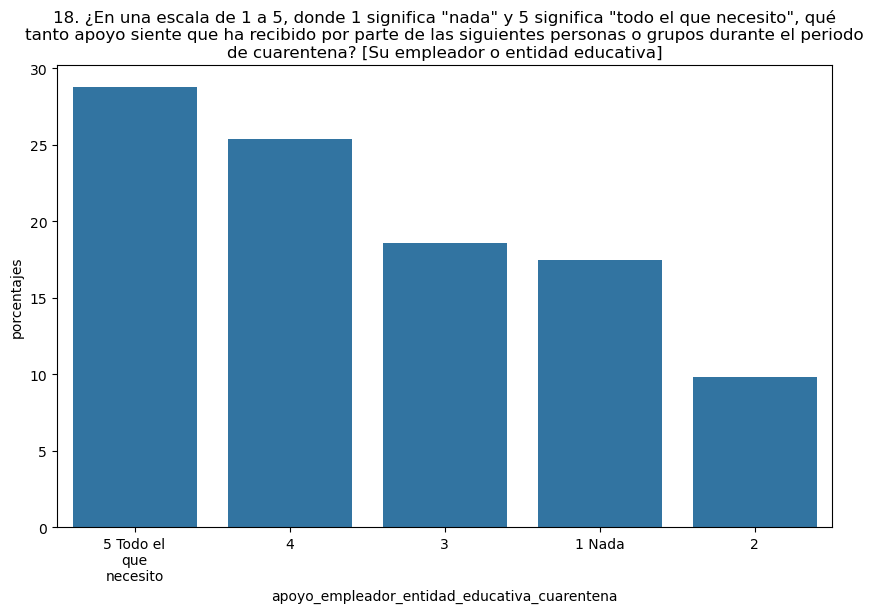

In [496]:
show_distribution(33)


Nombre de variable: apoyo_vecinos_cuarentena
1 Nada: 46.29%
3: 20.64%
2: 16.70%
4: 10.96%
5 Todo el que necesito: 5.41%


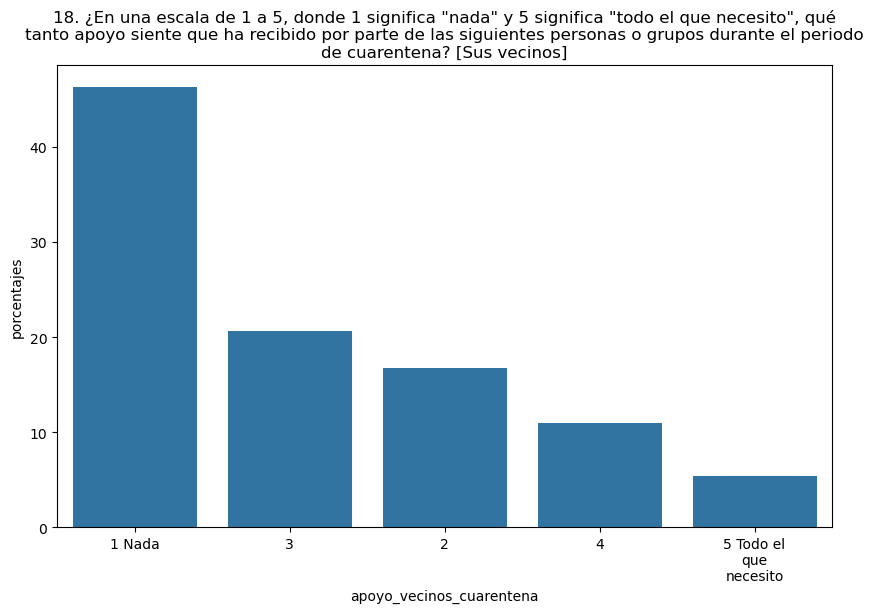

In [497]:
show_distribution(34)


Nombre de variable: apoyo_alcaldia_cuarentena
1 Nada: 31.42%
3: 23.72%
4: 19.70%
2: 13.71%
5 Todo el que necesito: 11.45%


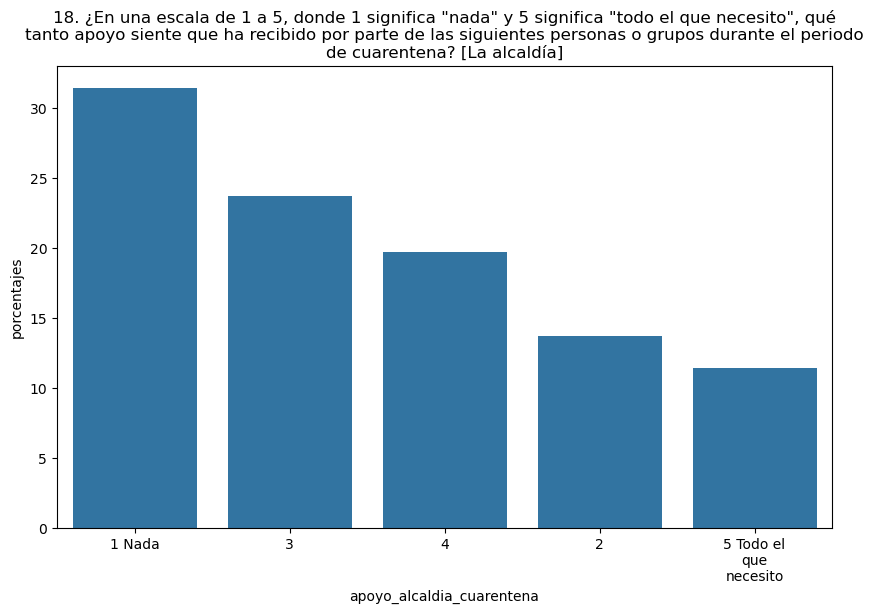

In [498]:
show_distribution(35)


Nombre de variable: apoyo_gobierno_nacional_cuarentena
1 Nada: 44.93%
3: 19.72%
2: 18.07%
4: 11.17%
5 Todo el que necesito: 6.11%


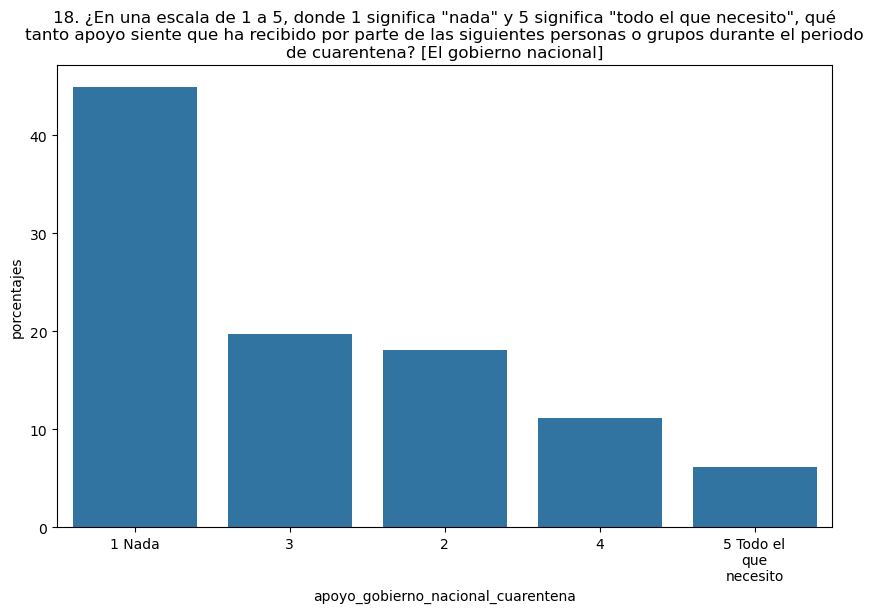

In [499]:
show_distribution(36)


Nombre de variable: sexo
Mujer: 64.91%
Hombre: 34.22%
Prefiero no decirlo: 0.58%
No binario: 0.28%


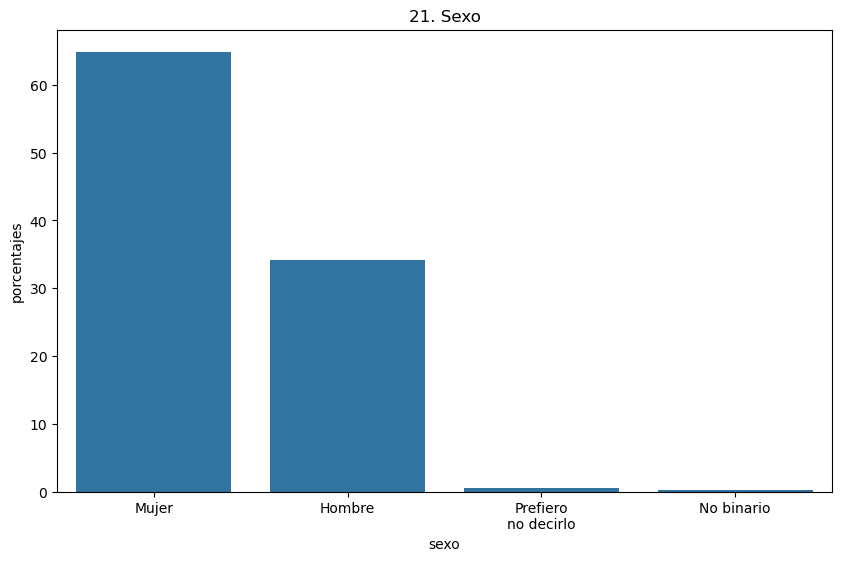

In [500]:
show_distribution(37)


Nombre de variable: rango_edad
De 46 a 59: 32.60%
De 36 a 45: 24.66%
De 26 a 35: 22.18%
De 15 a 25: 12.11%
Mayor de 60: 8.45%


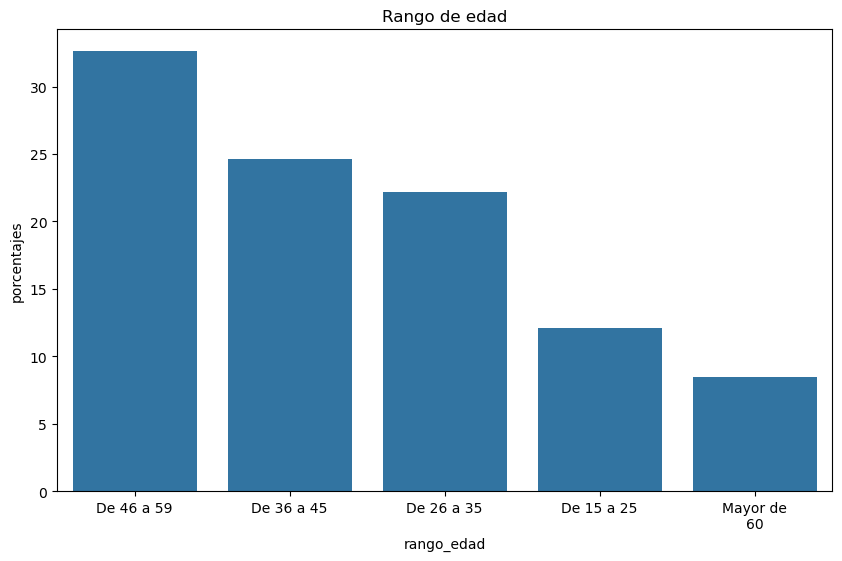

In [502]:
show_distribution(39)


Nombre de variable: diagnostico_enfermedades
Sí: 59.51%
No: 37.46%
No está seguro: 3.03%


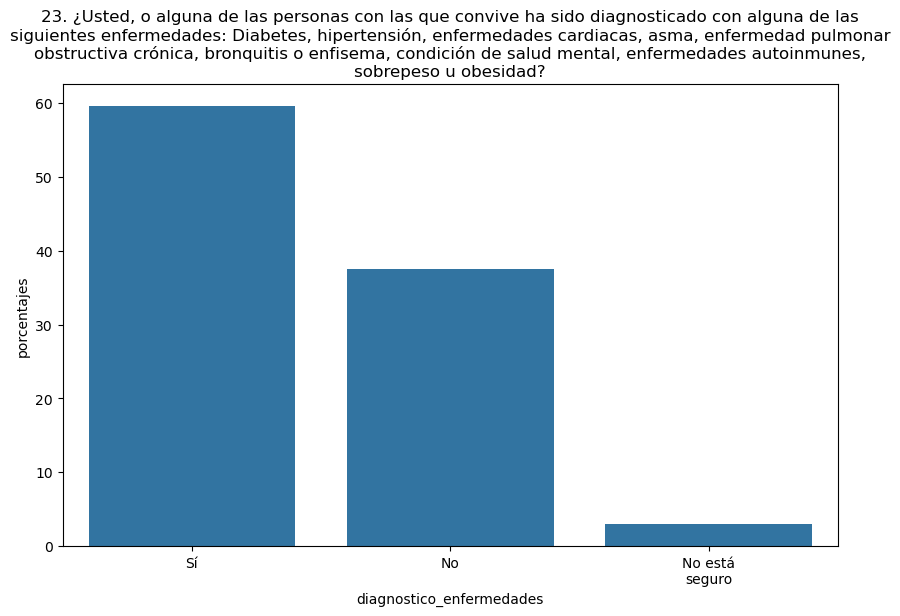

In [503]:
show_distribution(40)


Nombre de variable: nivel_educativo
Título de posgrado: 41.37%
Título universitario: 27.16%
Título técnico o tecnológico: 17.84%
Secundaria completa: 10.18%
Secundaria incompleta: 2.57%
Primaria completa: 0.62%
Primaria incompleta: 0.26%


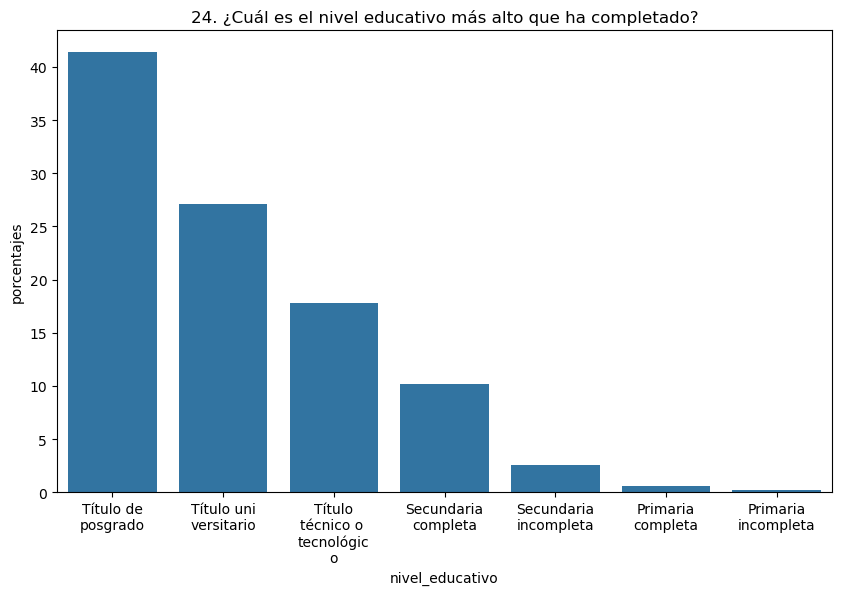

In [504]:
show_distribution(41)

In [511]:
df['localidad_residencia'].value_counts(normalize=True) * 100

localidad_residencia
Suba                   14.025610
Kennedy                12.244898
Engativá               12.144858
Usaquén                 8.963585
Fontibón                8.043217
Teusaquillo             6.022409
No reside en Bogotá     5.002001
Puente Aranda           4.201681
Ciudad Bolívar          3.701481
San Cristóbal           3.601441
Bosa                    3.601441
Chapinero               3.281313
Barrios Unidos          3.141257
Rafael Uribe Uribe      2.821128
Tunjuelito              2.340936
Usme                    1.960784
Santa Fe                1.800720
Antonio Nariño          1.160464
Los Mártires            1.100440
La Candelaria           0.560224
No sabe                 0.220088
Sumapaz                 0.060024
Name: proportion, dtype: float64